In [ ]:
import pandas as pd
import json
import re

# --------------------------------------------------
# Load and parse (using your working code)
# --------------------------------------------------
df = pd.read_csv(
    "games.csv",
    sep=',',
    quotechar='"',
    escapechar='\\',
    on_bad_lines="skip",
    engine='python'
)

df.columns = df.columns.str.strip().str.replace('"', '', regex=False)

def extract_price(x):
    if pd.isna(x) or x == '\\N':
        return None
    
    try:
        x = str(x)
        match = re.search(r'["\']?final["\']?\s*:\s*(\d+)', x)
        if match:
            return int(match.group(1)) / 100
        return None
    except Exception:
        return None

df["price"] = df["price_overview"].apply(extract_price)

# --------------------------------------------------
# Analyze missing prices
# --------------------------------------------------
print("=== MISSING PRICE ANALYSIS ===\n")

# Check is_free column
print("Free games:")
print(df['is_free'].value_counts())

# Check price_overview for missing prices
missing_price = df[df['price'].isna()]
print(f"\n{len(missing_price)} rows with missing prices")

print("\nSample of price_overview for missing prices:")
print(missing_price['price_overview'].value_counts().head(10))

# Calculate null values separately to avoid backslash in f-string
null_marker = '\\N'
null_count = missing_price['price_overview'].isna().sum() + (missing_price['price_overview'] == null_marker).sum()
free_count = len(missing_price[missing_price['is_free'] == 1])
other_count = len(missing_price) - free_count - null_count

print("\nBreakdown of missing prices:")
print(f"- Free games (is_free=1): {free_count}")
print(f"- Null/\\N price_overview: {null_count}")
print(f"- Other: {other_count}")

print("\n=== SUCCESSFULLY EXTRACTED ===")
print(f"Paid games with prices: {df['price'].notna().sum()}")
print(f"Percentage: {df['price'].notna().sum() / len(df) * 100:.1f}%")

In [ ]:
import pandas as pd
import re

# --------------------------------------------------
# Load and parse
# --------------------------------------------------
df = pd.read_csv(
    "games.csv",
    sep=',',
    quotechar='"',
    escapechar='\\',
    on_bad_lines="skip",
    engine='python'
)

df.columns = df.columns.str.strip().str.replace('"', '', regex=False)

def extract_price(x):
    if pd.isna(x) or x == '\\N' or x == 'N':
        return None
    
    try:
        x = str(x)
        match = re.search(r'["\']?final["\']?\s*:\s*(\d+)', x)
        if match:
            return int(match.group(1)) / 100
        return None
    except Exception:
        return None

df["price"] = df["price_overview"].apply(extract_price)

# --------------------------------------------------
# Final statistics
# --------------------------------------------------
print("=== FINAL STATISTICS ===\n")

total = len(df)
free_games = (df['is_free'] == 1).sum()
paid_games = (df['is_free'] == 0).sum()
paid_with_price = (df['is_free'] == 0) & (df['price'].notna())
paid_without_price = (df['is_free'] == 0) & (df['price'].isna())

print(f"Total games: {total:,}")
print(f"\nFree games: {free_games:,} ({free_games/total*100:.1f}%)")
print(f"Paid games: {paid_games:,} ({paid_games/total*100:.1f}%)")
print(f"  - With price data: {paid_with_price.sum():,} ({paid_with_price.sum()/paid_games*100:.1f}% of paid)")
print(f"  - Missing price data: {paid_without_price.sum():,} ({paid_without_price.sum()/paid_games*100:.1f}% of paid)")

print("\n=== DATA QUALITY ===")
print(f"Successfully extracted prices: {df['price'].notna().sum():,} / {total:,} ({df['price'].notna().sum()/total*100:.1f}%)")
print(f"Price extraction rate for paid games: {paid_with_price.sum():,} / {paid_games:,} ({paid_with_price.sum()/paid_games*100:.1f}%)")

# Show sample of paid games without prices
print("\n=== SAMPLE: Paid games without price data ===")
print(df[paid_without_price][['app_id', 'name', 'release_date', 'price_overview']].head(10))

In [ ]:
import pandas as pd
import json
import re

# --------------------------------------------------
# Load and parse (using your working code)
# --------------------------------------------------
df = pd.read_csv(
    "games.csv",
    sep=',',
    quotechar='"',
    escapechar='\\',
    on_bad_lines="skip",
    engine='python'
)

df.columns = df.columns.str.strip().str.replace('"', '', regex=False)

def extract_price(x):
    if pd.isna(x) or x == '\\N':
        return None
    
    try:
        x = str(x)
        match = re.search(r'["\']?final["\']?\s*:\s*(\d+)', x)
        if match:
            return int(match.group(1)) / 100
        return None
    except Exception:
        return None

df["price"] = df["price_overview"].apply(extract_price)

# --------------------------------------------------
# Analyze missing prices
# --------------------------------------------------
print("=== MISSING PRICE ANALYSIS ===\n")

# Check is_free column
print("Free games:")
print(df['is_free'].value_counts())

# Check price_overview for missing prices
missing_price = df[df['price'].isna()]
print(f"\n{len(missing_price)} rows with missing prices")

print("\nSample of price_overview for missing prices:")
print(missing_price['price_overview'].value_counts().head(10))

# Calculate null values separately to avoid backslash in f-string
null_marker = '\\N'
null_count = missing_price['price_overview'].isna().sum() + (missing_price['price_overview'] == null_marker).sum()
free_count = len(missing_price[missing_price['is_free'] == 1])
other_count = len(missing_price) - free_count - null_count

print("\nBreakdown of missing prices:")
print(f"- Free games (is_free=1): {free_count}")
print(f"- Null/\\N price_overview: {null_count}")
print(f"- Other: {other_count}")

print("\n=== SUCCESSFULLY EXTRACTED ===")
print(f"Paid games with prices: {df['price'].notna().sum()}")
print(f"Percentage: {df['price'].notna().sum() / len(df) * 100:.1f}%")

=== CONVERSION RESULTS ===

Total games: 140,082
Games with EUR prices: 76,310
Conversion success rate: 54.5%

=== SAMPLE ===
                         name   price currency  price_eur
0              Counter-Strike    8.19      EUR       8.19
1       Team Fortress Classic    4.99      EUR       4.99
2               Day of Defeat    4.99      EUR       4.99
3          Deathmatch Classic    4.99      EUR       4.99
4   Half-Life: Opposing Force    4.99      EUR       4.99
..                        ...     ...      ...        ...
10                Half-Life 2  385.00      RUB       3.72
11     Counter-Strike: Source    9.75      EUR       9.75
12          Half-Life: Source    9.75      EUR       9.75
13      Day of Defeat: Source    9.75      EUR       9.75
14    Half-Life 2: Deathmatch    4.99      EUR       4.99

[15 rows x 4 columns]

=== PRICE STATISTICS (in EUR) ===
count    76310.000000
mean         8.328828
std         13.332037
min          0.000000
25%          2.390000
50%       

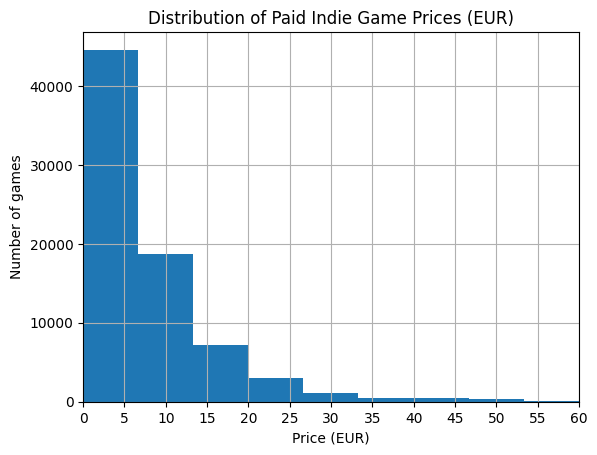

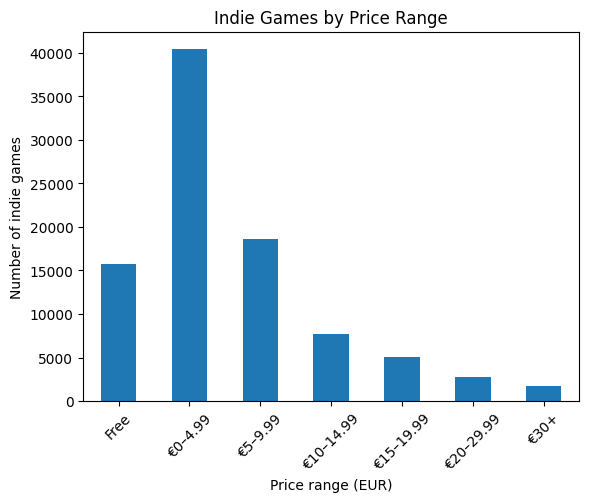

In [44]:

#This cell is needed for Q2
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt


# --------------------------------------------------
# Load and parse (your existing code)
# --------------------------------------------------
df = pd.read_csv(
    "games.csv",
    sep=',',
    quotechar='"',
    escapechar='\\',
    on_bad_lines="skip",
    engine='python'
)

df.columns = df.columns.str.strip().str.replace('"', '', regex=False)

def extract_price_and_currency(x):
    if pd.isna(x) or x == '\\N' or x == 'N':
        return None, None
    
    try:
        x = str(x)
        
        # Extract price
        price_match = re.search(r'["\']?final["\']?\s*:\s*(\d+)', x)
        price = int(price_match.group(1)) / 100 if price_match else None
        
        # Extract currency
        currency_match = re.search(r'["\']?currency["\']?\s*:\s*["\']([A-Z]{3})["\']', x)
        currency = currency_match.group(1) if currency_match else None
        
        return price, currency
        
    except Exception:
        return None, None

df[["price", "currency"]] = df["price_overview"].apply(
    lambda x: pd.Series(extract_price_and_currency(x))
)

# --------------------------------------------------
# Exchange rates to EUR (as of Dec 31, 2024)
# --------------------------------------------------
exchange_rates_to_eur = {
    'EUR': 1.0,
    'USD': 1 / 1.0389,
    'GBP': 1 / 0.82918,
    'JPY': 1 / 163.06,
    'CAD': 1 / 1.4785,
    'AUD': 1 / 1.6631,
    'CHF': 1 / 0.9367,
    'CNY': 1 / 7.5496,
    'SEK': 1 / 11.4840,
    'NZD': 1 / 1.8417,
    'MXN': 1 / 21.2110,
    'SGD': 1 / 1.4159,
    'HKD': 1 / 8.0726,
    'NOK': 1 / 11.8500,
    'KRW': 1 / 1518.82,
    'TRY': 1 / 36.7285,
    'RUB': 1 / 103.50,
    'INR': 1 / 89.05,
    'BRL': 1 / 6.32,
    'ZAR': 1 / 19.2520,
    'DKK': 1 / 7.4578,
    'PLN': 1 / 4.2625,
    'THB': 1 / 35.54,
    'MYR': 1 / 4.67,
    'HUF': 1 / 410.25,
    'CZK': 1 / 25.185,
    'ILS': 1 / 3.82,
    'CLP': 1 / 1023.50,
    'PHP': 1 / 60.85,
    'AED': 1 / 3.814,
    'COP': 1 / 4562.00,
    'SAR': 1 / 3.896,
    'VND': 1 / 26380,
}

# --------------------------------------------------
# Convert all prices to EUR and round to 2 decimals
# --------------------------------------------------
def convert_to_eur(row):
    if pd.isna(row['price']) or pd.isna(row['currency']):
        return None
    
    rate = exchange_rates_to_eur.get(row['currency'])
    if rate is None:
        return None
    
    return round(row['price'] * rate, 2)

df['price_eur'] = df.apply(convert_to_eur, axis=1)

# --------------------------------------------------
# Results
# --------------------------------------------------
print("=== CONVERSION RESULTS ===\n")
print(f"Total games: {len(df):,}")
print(f"Games with EUR prices: {df['price_eur'].notna().sum():,}")
print(f"Conversion success rate: {df['price_eur'].notna().sum() / len(df) * 100:.1f}%")

print("\n=== SAMPLE ===")
print(df[['name', 'price', 'currency', 'price_eur']].head(15))

print("\n=== PRICE STATISTICS (in EUR) ===")
print(df['price_eur'].describe())

print("\n=== TOP 10 MOST EXPENSIVE GAMES ===")
most_expensive = df.nlargest(10, 'price_eur')[['name', 'price_eur', 'currency', 'release_date']]
print(most_expensive)
print(f"Loaded rows: {len(df)}")
df_games = df[df["type"] == "game"].copy()
 # --------------------------------------------------
# Q2 ANALYSIS — PRICE DISTRIBUTION
# --------------------------------------------------

df_games = df[df["type"] == "game"].copy()

# 1️⃣ Explicitly mark free games
df_games.loc[df_games["is_free"] == True, "price_bucket"] = "Free"

# 2️⃣ Bucket paid games ONLY
paid_mask = (df_games["is_free"] == False) & (df_games["price_eur"].notna())

bins = [0, 5, 10, 15, 20, 30, np.inf]
labels = [
    "€0–4.99",
    "€5–9.99",
    "€10–14.99",
    "€15–19.99",
    "€20–29.99",
    "€30+"
]

df_games.loc[paid_mask, "price_bucket"] = pd.cut(
    df_games.loc[paid_mask, "price_eur"],
    bins=bins,
    labels=labels,
    right=False
)

# --------------------------------------------------
# Plot 1 — Histogram (PAID games only)
# --------------------------------------------------

plt.figure()
df_games.loc[paid_mask, "price_eur"].hist(bins=150)
plt.xlim(0, 60)
plt.xticks(range(0, 61, 5))
plt.xlabel("Price (EUR)")
plt.ylabel("Number of games")
plt.title("Distribution of Paid Indie Game Prices (EUR)")
plt.show()

# --------------------------------------------------
# Plot 2 — Price buckets (Free INCLUDED)
# --------------------------------------------------

bucket_order = [
    "Free",
    "€0–4.99",
    "€5–9.99",
    "€10–14.99",
    "€15–19.99",
    "€20–29.99",
    "€30+"
]

bucket_counts = (
    df_games["price_bucket"]
    .value_counts()
    .reindex(bucket_order)
)

plt.figure()
bucket_counts.plot(kind="bar")
plt.xlabel("Price range (EUR)")
plt.ylabel("Number of indie games")
plt.title("Indie Games by Price Range")
plt.xticks(rotation=45)
plt.show()


['app_id', 'genre']
   app_id                       name
0      10             Counter-Strike
1      20      Team Fortress Classic
2      30              Day of Defeat
3      40         Deathmatch Classic
4      50  Half-Life: Opposing Force
++++==+++++++++ the unique values are ['Action' 'Adventure' 'Casual' 'Simulation' 'RPG' 'Strategy' 'Sports'
 'Racing' 'Massively Multiplayer' 'Violent' 'Gore' 'Software Training'
 'Nudity' 'Sexual Content' 'Aventura' 'Rollenspiel' 'Abenteuer'
 'Kostenlos spielbar' 'Aventure' 'Strategie' 'Simuladores' 'Simulationen'
 'Free-to-play' 'Actie' 'Azione' 'Rol' 'Acceso anticipado' 'Estrategia'
 'Avontuur' 'Carreras' 'Gelegenheitsspiele' 'Deportes'
 'Multijugador masivo' 'Movie' 'Occasionnel' 'Free to Play' 'Sport'
 'Strategia' 'MMO' 'Passatempo' 'Massivement multijoueur' 'GDR'
 'Documentary' 'Eventyr' 'Episodic' 'Avventura' 'Course automobile'
 '360 Video' 'Akcja' 'Race' 'Strategi' 'Utilidades' 'Simulatie'
 'Simulaatio' 'Simulering' 'Short' 'Seikkailu' 'Ro

<Figure size 640x480 with 0 Axes>

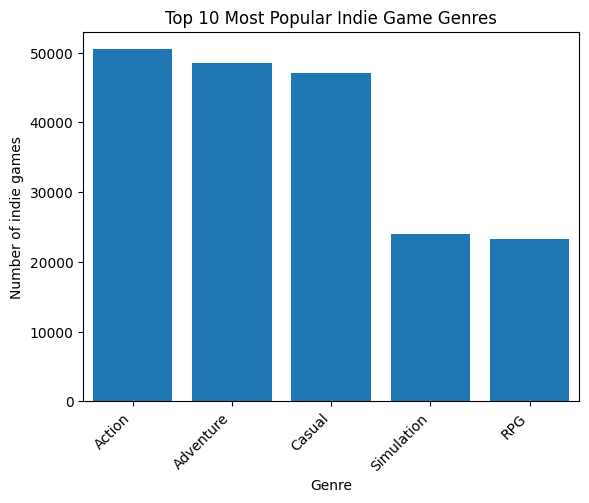

============= For the least popular genres:


<Figure size 640x480 with 0 Axes>

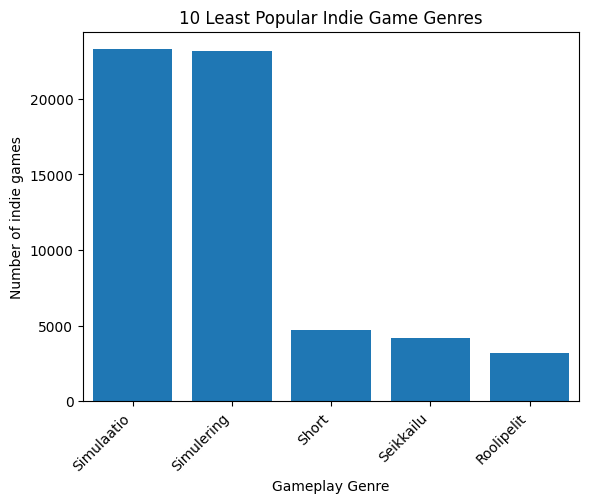

============================== For tags


<Figure size 640x480 with 0 Axes>

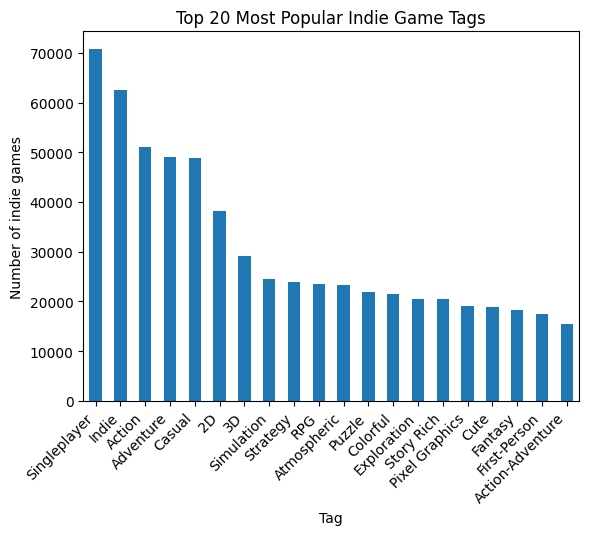

0                     Counter-Strike
1              Team Fortress Classic
2                      Day of Defeat
3                 Deathmatch Classic
4          Half-Life: Opposing Force
                     ...            
140077                    Hacky Demo
140078          Quantum of Hope Demo
140079        A Night With: Succubus
140080                 心所向往的北极星 Demo
140081    S.X.E. Slider: Hard Ridin'
Name: name, Length: 140082, dtype: object


In [ ]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt


# --------------------------------------------------
# Load and parse (your existing code)
# --------------------------------------------------
df = pd.read_csv(
    "games.csv",
    sep=',',
    quotechar='"',
    escapechar='\\',
    on_bad_lines="skip",
    engine='python'
)

df.columns = df.columns.str.strip().str.replace('"', '', regex=False)
genres_df = pd.read_csv(
    "genres.csv",
    sep=",",
    quotechar='"',
    engine="python"
)

print(genres_df.columns.tolist())

tags_df = pd.read_csv(
    "tags.csv",
    engine="python",
    sep = ",",
    quotechar='"'

    
)


#To improve safety
genres_df["genre"] = genres_df["genre"].str.strip()
tags_df["tag"] = tags_df["tag"].str.strip()

df_games = df[df["type"] == "game"][["app_id", "name"]].copy()
print("========================================")
print(df_games.head())
#Merge table using inner join
genres_indie = genres_df.merge(df_games, on="app_id", how="inner")
tags_indie = tags_df.merge(df_games, on="app_id", how="inner")

#Excluded Genres
EXCLUDED_GENRES = {
    "Indie",
    "Early Access",
    "Free To Play",
    "Free to Play"
    "Utilities",
    "Software",
    "Animation & Modeling",
    "Design & Illustration",
    "Education",
    "Audio Production",
    "Video Production",
    "Web Publishing",
    "Accounting",
    "Photo Editing",
    "Game Development",
    "Tutorial"
}

genres_filtered = genres_indie[
    ~genres_indie["genre"].isin(EXCLUDED_GENRES)
]


genre_counts = (
    genres_filtered
    .groupby("genre")
    .size()
    .sort_values(ascending=False)
    .reset_index(name="game_count")
)
genre_counts["genre"] = genre_counts["genre"].astype(str)

genre_counts = genre_counts[
    genre_counts["genre"].str.match(r"^[A-Za-z0-9 &\-]+$")
]




genre_counts.columns = ["genre", "game_count"]
unique_values = genre_counts.genre.unique()
print(f"++++==+++++++++ the unique values are {unique_values} ")
top_genres = genre_counts.head(5)
bottom_genres = genre_counts.tail(5)
print("Total genre rows:", len(genres_df))
print("Indie games rows:", len(df_games))
print("Genres after merge:", len(genres_indie))
print(f"Total tags rows, {len(tags_df)} ")

plt.figure()
top_genres.plot(
    kind="bar",
    x="genre",
    y="game_count",
    legend=False
)

plt.xlabel("Genre")
plt.bar(top_genres["genre"], top_genres["game_count"])
plt.ylabel("Number of indie games")
plt.title("Top 10 Most Popular Indie Game Genres")
plt.xticks(rotation=45, ha="right")
plt.show()

print("============= For the least popular genres:")
MIN_GAMES = 50

genre_counts_filtered = genre_counts[
    genre_counts["game_count"] >= MIN_GAMES
]

least_popular_genres = genre_counts_filtered.tail(10)
plt.figure()
bottom_genres.plot(
    kind="bar",
    x="genre",
    y="game_count",
    legend=False
)
plt.bar(least_popular_genres["genre"], least_popular_genres["game_count"])
plt.xlabel("Gameplay Genre")
plt.ylabel("Number of indie games")
plt.title("10 Least Popular Indie Game Genres")
plt.xticks(rotation=45, ha="right")
plt.show()

print("============================== For tags")
tag_counts = (
    tags_indie["tag"]
    .value_counts()
    .reset_index()
)

tag_counts.columns = ["tag", "game_count"]
top_tags = tag_counts.head(20)

plt.figure()
top_tags.plot(
    kind="bar",
    x="tag",
    y="game_count",
    legend=False
)

plt.xlabel("Tag")
plt.ylabel("Number of indie games")
plt.title("Top 20 Most Popular Indie Game Tags")
plt.xticks(rotation=45, ha="right")
plt.show()
print(df["name"])